** Task - 2**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from tabulate import tabulate
import seaborn as sns

In [ ]:
import pandas as pd

# Define the file path
file_path = '/content/StudentsPerformance.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

**Task - 2:  Load the dataset**

In [ ]:
# Display the first 10 rows in a table format
print(tabulate(df.head(10), headers='keys', tablefmt='psql'))

+----+----------+------------------+-------------------------------+--------------+---------------------------+--------------+-----------------+-----------------+
|    | gender   | race/ethnicity   | parental level of education   | lunch        | test preparation course   |   math score |   reading score |   writing score |
|----+----------+------------------+-------------------------------+--------------+---------------------------+--------------+-----------------+-----------------|
|  0 | female   | group B          | bachelor's degree             | standard     | none                      |           72 |              72 |              74 |
|  1 | female   | group C          | some college                  | standard     | completed                 |           69 |              90 |              88 |
|  2 | female   | group B          | master's degree               | standard     | none                      |           90 |              95 |              93 |
|  3 | male     | grou

#  Perform exploratory data analysis

**Task-03 => Check for missing value**

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


**Check for outliers**

In [ ]:
# Identify outliers using Tukey's method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Determine the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ((df < lower_bound) | (df > upper_bound)).any()

# Print the presence of outliers
print("Outliers:\n", outliers)

Outliers:
 gender                         False
lunch                          False
math score                      True
parental level of education    False
race/ethnicity                 False
reading score                   True
test preparation course        False
writing score                   True
dtype: bool


<ipython-input-43-cd564b5ba369>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-43-cd564b5ba369>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-43-cd564b5ba369>:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df < lower_bound) | (df > upper_bound)).any()


In [ ]:
# Specify the numerical columns
numerical_columns = ["math score", "reading score", "writing score"]

# Identify outliers using Tukey's method and replace with upper and lower bounds
for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, np.where(df[column] > upper_bound, upper_bound, df[column]))


In [ ]:
outliers_exist = any(((df[column] < lower_bound) | (df[column] > upper_bound)).any() for column in numerical_columns)
print("Outliers exist:", outliers_exist)


Outliers exist: False


#  Perform data visualization

**Create a bar plot to show the distribution of male and female students in the dataset.**

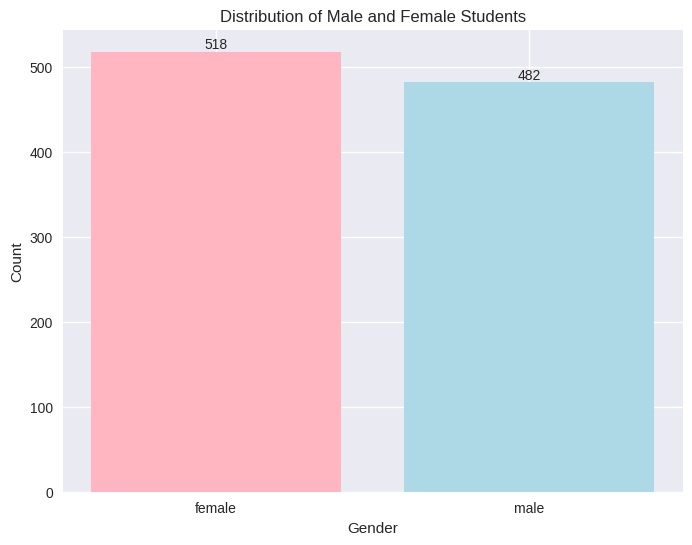

In [ ]:
# Count the number of male and female students
gender_counts = df['gender'].value_counts()

# Define colors
colors = ['lightpink', 'lightblue']

# Create the bar plot
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(gender_counts.index, gender_counts.values, color=colors)

# Add labels and title
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.set_title('Distribution of Male and Female Students')

# Add count labels on top of the bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height,
            f'{height}', ha='center', va='bottom')

# Show the plot
plt.show()

**Create a histogram to show the distribution of the scores in math, reading, and writing.**

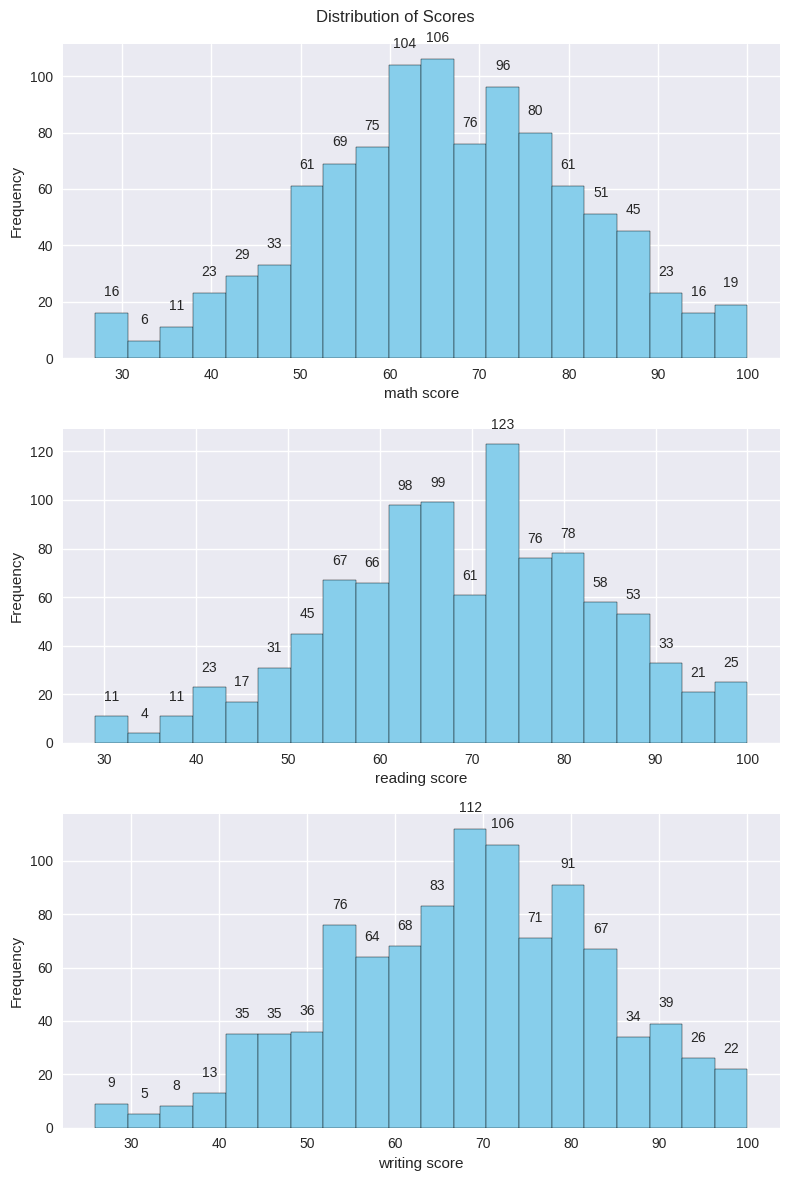

In [ ]:
# Specify the columns for which to create histograms
score_columns = ["math score", "reading score", "writing score"]

# Create subplots for histograms
fig, axes = plt.subplots(nrows=len(score_columns), ncols=1, figsize=(8, 12))

# Create histograms for each score column
for i, column in enumerate(score_columns):
    counts, bins, patches = axes[i].hist(df[column], bins=20, color='skyblue', edgecolor='black')

    # Add count labels above each bar
    for count, patch in zip(counts, patches):
        axes[i].text(patch.get_x() + patch.get_width() / 2, count + 5, str(int(count)),
                     ha='center', va='bottom')

    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Set the overall plot title
plt.suptitle('Distribution of Scores')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

**Create a bar plot to show the average scores in math, reading, and writing for each gender. **

<ipython-input-48-3ce4e9e3cb1d>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gender_avg_scores = df.groupby('gender')['math score', 'reading score', 'writing score'].mean()


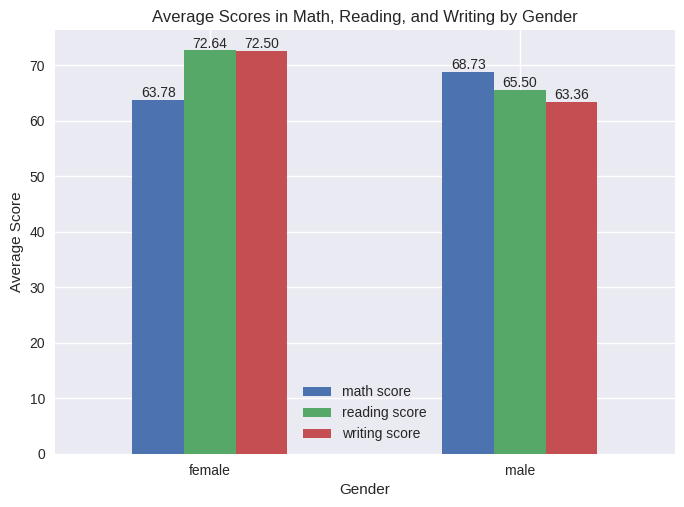

In [ ]:
# Calculate the average scores for each gender
gender_avg_scores = df.groupby('gender')['math score', 'reading score', 'writing score'].mean()

# Create the bar plot
ax = gender_avg_scores.plot(kind='bar', rot=0)

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Average Score')
plt.title('Average Scores in Math, Reading, and Writing by Gender')

# Add the number of data points to the top of the bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.show()


**Create a scatter plot to show the relationship between math, reading, and writing scores.**

<ipython-input-53-4d64f44f9659>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


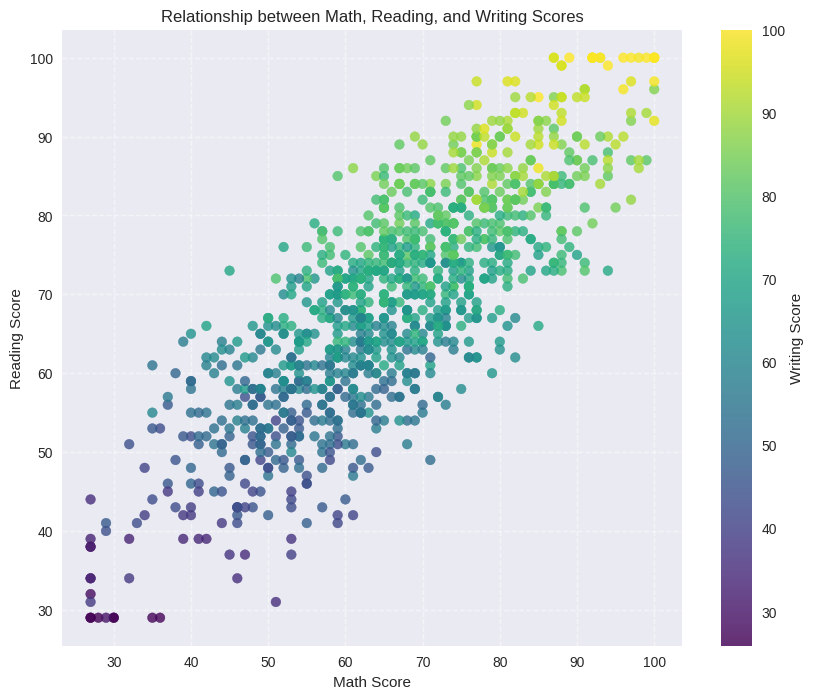

In [ ]:
# Set up the plot style
plt.style.use('seaborn')

# Create the scatter plot
fig, ax = plt.subplots(figsize=(10, 8))
scatter = ax.scatter(df['math score'], df['reading score'], c=df['writing score'], cmap='viridis', alpha=0.8)

# Add labels and title
ax.set_xlabel('Math Score')
ax.set_ylabel('Reading Score')
ax.set_title('Relationship between Math, Reading, and Writing Scores')

# Add a colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Writing Score')

# Add gridlines
ax.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()

In [ ]:
# Calculate mean, median, and mode
mean_scores = df[['math score', 'reading score', 'writing score']].mean()
median_scores = df[['math score', 'reading score', 'writing score']].median()
mode_scores = df[['math score', 'reading score', 'writing score']].mode().iloc[0]

# Calculate standard deviation
std_scores = df[['math score', 'reading score', 'writing score']].std()

# Print the results
print("Mean Scores:")
print(mean_scores)
print("\nMedian Scores:")
print(median_scores)
print("\nMode Scores:")
print(mode_scores)
print("\nStandard Deviation:")
print(std_scores)

Mean Scores:
math score       66.165000
reading score    69.201000
writing score    68.094375
dtype: float64

Median Scores:
math score       66.0
reading score    70.0
writing score    69.0
dtype: float64

Mode Scores:
math score       65.0
reading score    72.0
writing score    74.0
Name: 0, dtype: float64

Standard Deviation:
math score       14.922414
reading score    14.503481
writing score    15.068368
dtype: float64


In [ ]:
# Separate scores for male and female students
math_male = df.loc[df['gender'] == 'male', 'math score']
math_female = df.loc[df['gender'] == 'female', 'math score']
reading_male = df.loc[df['gender'] == 'male', 'reading score']
reading_female = df.loc[df['gender'] == 'female', 'reading score']
writing_male = df.loc[df['gender'] == 'male', 'writing score']
writing_female = df.loc[df['gender'] == 'female', 'writing score']

# Perform t-tests
ttest_math = stats.ttest_ind(math_male, math_female)
ttest_reading = stats.ttest_ind(reading_male, reading_female)
ttest_writing = stats.ttest_ind(writing_male, writing_female)

# Print the results
print("\nT-Test Results:")
print("Math Score: ", ttest_math)
print("Reading Score: ", ttest_reading)
print("Writing Score: ", ttest_writing)



T-Test Results:
Math Score:  Ttest_indResult(statistic=5.310535876060364, pvalue=1.347503651215304e-07)
Reading Score:  Ttest_indResult(statistic=-8.017817458844153, pvalue=2.9964495345858663e-15)
Writing Score:  Ttest_indResult(statistic=-10.061885825281898, pvalue=9.475859176457149e-23)
